<a href="https://colab.research.google.com/github/Demon-Sheriff/Aerofit_Case_Study/blob/master/Aerofit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first lets import the data from the given file
# lets also import the required libraries that we are going to use

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# lets get the data file
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 8.17MB/s]


In [ ]:
# read the file that we have imported
data = pd.read_csv('aerofit_treadmill.csv?1639992749')

# Product Details

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.



In [ ]:
# data characteristics
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Data Characteristics
1. Age - The age range of customers spans from 18 to 50 year, with an average age of 29 years.

2. Education - Customer education levels vary between 12 and 21 years, with an average education duration of 16 years.

3. Usage - Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average usage frequency of 3 times per week.

4. Fitness - On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness.

5. Income - The annual income of customers falls within the range of USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.

6. Miles - Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week


In [ ]:
# lets group the age feature into four buckets

# Young Adult: from 18 - 25
# Adults: from 26 - 35
# Middle Aged Adults: 36-45
# Elder :46 and above

bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

data['age_group'] = pd.cut(data['Age'],bins = bin_range1,labels = bin_labels1)


In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults


In [ ]:
data.sort_values(by = 'Miles',ascending = False)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
173,KP781,35,Male,16,Partnered,4,5,92131,360,Adults
166,KP781,29,Male,14,Partnered,7,5,85906,300,Adults
167,KP781,30,Female,16,Partnered,6,5,90886,280,Adults
170,KP781,31,Male,16,Partnered,6,5,89641,260,Adults
155,KP781,25,Male,18,Partnered,6,5,75946,240,Young Adults
...,...,...,...,...,...,...,...,...,...,...
106,KP481,25,Female,14,Single,2,2,45480,42,Young Adults
59,KP281,33,Female,16,Single,2,2,55713,38,Adults
51,KP281,29,Female,14,Partnered,2,2,46617,38,Adults
19,KP281,23,Female,15,Partnered,2,2,34110,38,Young Adults


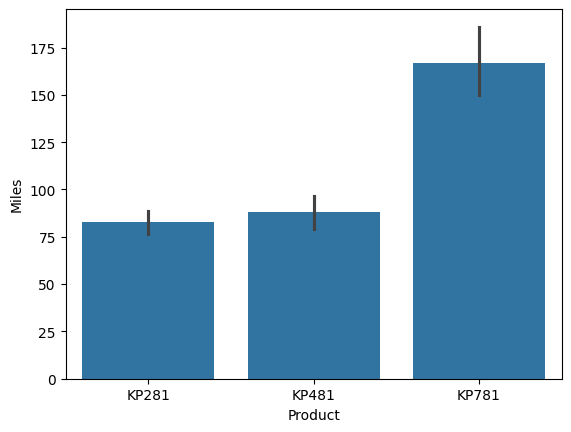

In [ ]:
# the first parameter that i can think of to recommend any treadmil is by how much a customer uses it
# so lets plot a bar plot between Miles and Product

sns.barplot(data = data, x = 'Product', y = 'Miles')
plt.show()

# Inference

From the above barplot we can see the people who have the advanced model KP781 are running more per week as their miles are higher.

In [ ]:
data.groupby(by = 'Product').count()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
Product,,,,,,,,,
KP281,80,80,80,80,80,80,80,80,80
KP481,60,60,60,60,60,60,60,60,60
KP781,40,40,40,40,40,40,40,40,40


In [ ]:
data[data['Product'] == 'KP781']['Miles'].max()

360

<Axes: xlabel='Product', ylabel='Miles'>

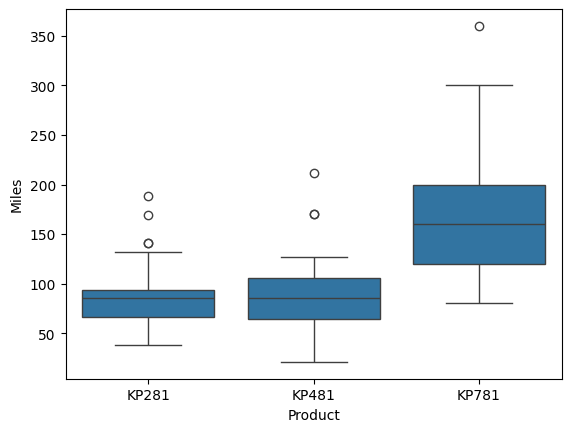

In [ ]:
sns.boxplot(data = data, x = 'Product', y = 'Miles')

<Axes: xlabel='Product', ylabel='Miles'>

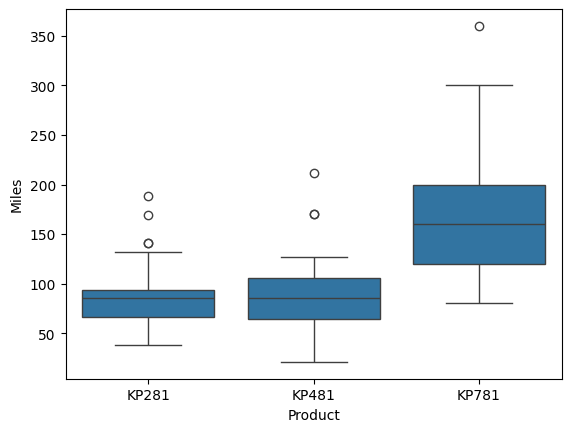

In [ ]:
sns.boxplot(data=data, x='Product', y='Miles', showfliers=True, whis=1.5)

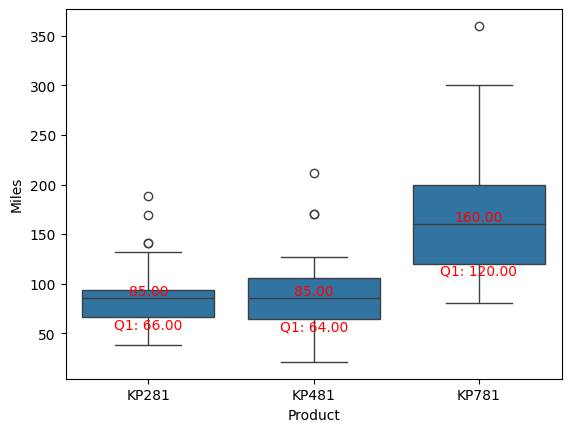

In [ ]:
ax = sns.boxplot(data=data, x='Product', y='Miles', showfliers=True, whis=1.5)

# print the median and q1
medians = data.groupby('Product')['Miles'].median().values
quantiles = data.groupby('Product')['Miles'].quantile(0.25).values

for i, (median_val, quantile_val) in enumerate(zip(medians, quantiles)):
    ax.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', color='red', fontsize=10)
    ax.text(i, quantile_val, f'Q1: {quantile_val:.2f}', ha='center', va='top', color='red', fontsize=10)

plt.show()

In [ ]:
data[data['Fitness'] > 4.5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
23,KP281,24,Female,16,Partnered,5,5,44343,188,Young Adults
61,KP281,34,Male,16,Single,4,5,51165,169,Adults
141,KP781,22,Male,16,Single,3,5,54781,120,Young Adults
142,KP781,22,Male,18,Single,4,5,48556,200,Young Adults
143,KP781,23,Male,16,Single,4,5,58516,140,Young Adults
145,KP781,23,Male,16,Single,4,5,48556,100,Young Adults
146,KP781,24,Male,16,Single,4,5,61006,100,Young Adults
147,KP781,24,Male,18,Partnered,4,5,57271,80,Young Adults
148,KP781,24,Female,16,Single,5,5,52291,200,Young Adults
149,KP781,24,Male,16,Single,5,5,49801,160,Young Adults


In [ ]:
# lets extract people who have rated themselves in fitness as >= 4 and observe what machine they have
data[data['Fitness'] >= 4]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults
8,KP281,21,Male,15,Single,5,4,35247,141,Young Adults
23,KP281,24,Female,16,Partnered,5,5,44343,188,Young Adults
31,KP281,25,Male,16,Single,3,4,40932,113,Young Adults
34,KP281,26,Female,14,Partnered,3,4,44343,113,Adults
39,KP281,26,Male,16,Partnered,4,4,44343,132,Adults
53,KP281,30,Male,14,Partnered,4,4,46617,141,Adults
57,KP281,32,Female,14,Single,3,4,46617,113,Adults
61,KP281,34,Male,16,Single,4,5,51165,169,Adults
72,KP281,39,Male,16,Partnered,4,4,59124,132,Middle Aged Adults


In [ ]:
# lets get the number of people who have bought KP781 and mark their fitness as 3
fitness3_KP781 = data[(data['Fitness'] == 3) & (data['Product'] == 'KP781')].describe()
fitness3_KP781

,Age,Education,Usage,Fitness,Income,Miles
count,4.000000,4.000000,4.0,4.0,4.000000,4.0
mean,25.000000,17.750000,4.0,3.0,67879.000000,101.5
std,2.160247,2.872281,0.0,0.0,16366.980357,3.0
min,22.000000,14.000000,4.0,3.0,48658.000000,100.0
25%,24.250000,17.000000,4.0,3.0,60720.250000,100.0
50%,25.500000,18.000000,4.0,3.0,67231.000000,100.0
75%,26.250000,18.750000,4.0,3.0,74389.750000,101.5
max,27.000000,21.000000,4.0,3.0,88396.000000,106.0


In [ ]:
data[data['Fitness'] == 3].shape

(97, 10)

In [ ]:
data.groupby(by = 'Fitness').describe()

Age                                                      Education  \
        count       mean       std   min    25%   50%    75%   max     count   
Fitness                                                                        
1         2.0  27.000000  5.656854  23.0  25.00  27.0  29.00  31.0       2.0   
2        26.0  28.269231  6.885101  20.0  23.25  25.5  32.50  46.0      26.0   
3        97.0  28.752577  7.059318  19.0  23.00  26.0  33.00  50.0      97.0   
4        24.0  28.333333  6.531973  18.0  25.00  26.0  32.25  44.0      24.0   
5        31.0  29.806452  7.295749  22.0  24.00  28.0  33.50  48.0      31.0   

                    ...    Income           Miles                         \
              mean  ...       75%       max count        mean        std   
Fitness             ...                                                    
1        17.000000  ...  58579.50   65220.0   2.0   34.000000  18.384776   
2        14.730769  ...  53154.75   60261.0  26.0   51.692308  11.824616   
3        15.237113  ...  54576.00   88396.0  97.0   87.185567  19.203586   
4        15.791667  ...  59905.75  103336.0  24.0  131.625000  37.623781   
5        17.064516  ...  91508.50  104581.0  31.0  178.935484  60.290926   

                                            
          min     25%    50%    75%    max  
Fitness                                     
1        21.0   27.50   34.0   40.5   47.0  
2        38.0   43.25   47.0   53.0   85.0  
3        53.0   75.00   85.0   95.0  170.0  
4        74.0  106.00  127.0  160.0  212.0  
5        80.0  150.00  170.0  200.0  360.0  

[5 rows x 40 columns]

<Axes: xlabel='Product', ylabel='count'>

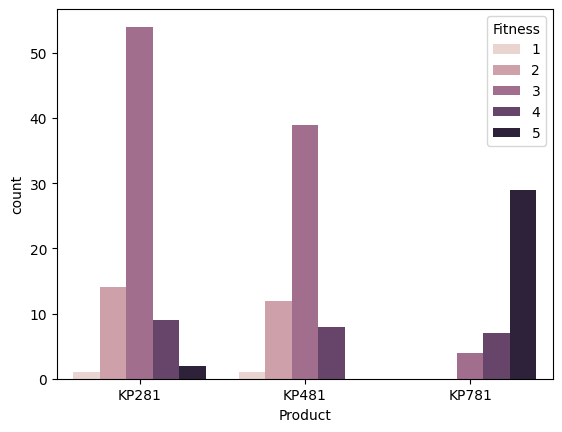

In [ ]:
# lets create a dodged barplot to see the distribution of fitness levels in one machine
sns.countplot(data = data, x= 'Product', hue = 'Fitness')

# From the above plot it is clear that people with fitness level 5 are preferring the advnaced model

# Also the people with fitness level 2 and 3 are more leaning towards the intermediate and basic models KP281 and KP481

In [ ]:
data.groupby(by = 'Product').describe()

Age                                                  Education  \
        count   mean       std   min    25%   50%    75%   max     count   
Product                                                                    
KP281    80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0      80.0   
KP481    60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0      60.0   
KP781    40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0      40.0   

                    ...   Income           Miles                               \
              mean  ...      75%       max count        mean        std   min   
Product             ...                                                         
KP281    15.037500  ...  53439.0   68220.0  80.0   82.787500  28.874102  38.0   
KP481    15.116667  ...  53439.0   67083.0  60.0   87.933333  33.263135  21.0   
KP781    17.325000  ...  90886.0  104581.0  40.0  166.900000  60.066544  80.0   

                                     
           25%    50%    75%    max  
Product                              
KP281     66.0   85.0   94.0  188.0  
KP481     64.0   85.0  106.0  212.0  
KP781    120.0  160.0  200.0  360.0  

[3 rows x 48 columns]

In [ ]:
data.groupby(by = 'Product').value_counts()

In [ ]:
data[(data['Product'] == 'KP781')].groupby(by = 'Fitness').describe()

In [ ]:
data.groupby(by = 'Fitness').describe()

In [ ]:
data[(data['Product'] == 'KP781') & (data['Fitness'] == 5)].shape

In [ ]:
KP781_Probability_F5 = 29/31
KP781_Probability_F5

# Conclusion

# **So the probability that if a person rates him/her as 5 then the probability of then buying KP781 model is 0.93 which is very high !**

In [ ]:
# now lets check the probability if the fitness level of the person is 3 then
# will he buy KP281  or KP481 model.

In [ ]:
data.groupby(by = ['Product','Fitness']).describe()

In [ ]:
# So P((KP281 U KP481)/3) = P(KP281/3) + P(KP481/3) - P((K281 and K481)/3)

# assuming that one customer only buys one machine so a customer cannot buy both K
probability_K2_and_K4_suchthat_F3 = ((54/97) + (39/97)) - (0)
probability_K2_and_K4_suchthat_F3

# **Conclusion**

**So the probability that if a person rates him/her as 3 in Fitness then the probability of then buying KP281 or KP481 model is 0.95 which is very high !**


**Another thing that we can observe is that people who rate themselves as 1 in Fitness are very unlikely to buy any machine as the probability is 1/90 = 0.01**


In [ ]:
# Now lets plot customers who bought products on their salaries vs the machine they bought !
data.groupby(by = 'Income').describe()

In [ ]:
data.groupby(by = 'Fitness').describe()['Income']

In [ ]:
# lets plot based on salaries vs products


In [ ]:
income_based = data.groupby(by = ['Product', 'Income']).describe()
income_based.head(30)

In [ ]:
# lets take the data and sort it in asceding order based on income and then observe it
data_sorted_based_on_income = data.sort_values(by = 'Income')

In [ ]:
data_sorted_based_on_income

In [ ]:
# lets do a box plot first
palette = {'KP281': 'red', 'KP481': 'green', 'KP781': 'orange'}
Plot = sns.boxplot(data = data, x = 'Product', y = 'Income',palette = palette)

#Provide Annotations
medians = data.groupby('Product')['Income'].median().values
quantiles = data.groupby('Product')['Income'].quantile(0.25).values

for i, (median_val, quantile_val) in enumerate(zip(medians, quantiles)):
    Plot.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', color='#000080', fontsize=10)
    Plot.text(i, quantile_val, f'Q1: {quantile_val:.2f}', ha='center', va='top', color='#000080', fontsize=10)

plt.show()

**From the above boxplot we can observe the baseline as to what machine should be recommended based on the salary of the customer**

# The Q1 salary for KP781 is 58204
# The Q1 salary for KP481 is 44911
# The Q1 salary for KP281 is 38568

# Almost 60% of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.

Surprisingly 18% of the customers fall in the income group of (<40) suggesting almost 77% of the total customers fall in income group of below 60k and only 23% of them falling in 60k and above income group

In [ ]:
data_sorted_based_on_income.groupby(by = 'Product').describe()

In [ ]:
data_sorted_based_on_income.groupby(by = 'Product').describe()['Income']

In [ ]:
data.head()

# Analysis based on Gender

In [ ]:
# lets group on the basis of gender for machines
data.groupby(by = 'Gender').count()

In [ ]:
data.groupby(by = 'Gender').describe()

In [ ]:
data.groupby(by = ['Gender', 'Product']).value_counts()

In [ ]:
data.groupby(by = ['Gender', 'Product']).count()

In [ ]:
sns.countplot(data=data,x = 'Gender')

# The number of males is slightly more than females

In [ ]:
gender_vs_products = pd.crosstab(data['Gender'], data['Product'])
gender_vs_products

In [ ]:
gender_vs_products.plot(kind='bar', stacked=True, color=['blue', 'orange','purple'], edgecolor='black')

plt.title('Distribution of Gender Across Products')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Product', loc='upper right')
plt.legend(loc = (-0.3,0))

plt.show()

# Conclusion

**From the above stacked bar plot what we can conclude is that females are buying KP281 and KP481 more compared to KP781**

**Another thing we can conclude is that in males the distribution is sort of uniform so there is no sureshot answer for a Male to recommed them a machine just based on their gender , we will have to look at some other factors**

**If the person is a female the company should recommend them KP281 and KP481 modesl first**

In [ ]:

sns.countplot(data = data, x = 'Gender', hue = 'Product')

# distribution based on product and gender

In [ ]:
plt.figure(figsize=(12, 12))

ax = sns.countplot(data=data, x='Gender', hue='Product')

# Add numerical values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(loc = (1.1,1))
ax.legend(fontsize = 'large')
# Show the plot
plt.show()

# Inference

What we can see from the above dodged bar plot is that is that the chances of females buying the advanced model ***KP781*** ,

Lets calculate the probability for that

In [ ]:
probability_K7_female = 7/76
probability_K7_female

**The probability comes out to be 0.09 which is approximately 0.1  which is quite less !**

# Conclusion

**So if a person is female it is advisable not to recommend them KP781**

**Another observation that we can make is that for any person whether male or female the first machine to recommend is KP281**



In [ ]:
# Now lets create a bivariate plot, of gender and fitness
data.head()

In [ ]:
ax = sns.countplot(data = data, x= 'Gender', hue = 'Fitness')
# Add numerical values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [ ]:
# from the above bar plot i can see the people of fitness level 3 are distributed among the
# males and females almost uniformly

# now i want to visulaize the relation between Gender , Fitness and Products
# so for that we will be plotting a multivariate plot


In [ ]:
plt.figure(figsize=(20, 20))

# Create a grouped bar chart with nested subplots
g = sns.catplot(data=data, x='Product', hue='Gender', col='Fitness', kind='count', height=4, aspect=0.8)

# Add numerical values on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add titles and labels
g.set_axis_labels('Product', 'Count')
g.set_titles('Fitness Level {col_name}')

# Show the plot
plt.show()

# Conclusion

The most concentrated number of people are in fitness level 3

**For fitness level 3 irrespective of the gender the company should recommend KP281 and KP481 models**

In [ ]:
# so just out of curiosity lets plot a heat map.
sns.heatmap(data.corr(), cmap="Blues", annot = True)

In [ ]:
data.head()

In [ ]:
grouped_by_Age = data.groupby(by = 'Age').describe()
pd.crosstab(index=data['Age'], columns=data['MaritalStatus'])

In [ ]:
# lets first check how many people among age groups are married or unmarried
data.groupby(by = ['MaritalStatus']).describe()

In [ ]:
# based on the above observations lets group the ages into categories as young, midage, and old
# another plot that we can look at is the number of single people and what sort of machines are they buying

data_of_singles = data[data['MaritalStatus'] == 'Single']
data_of_singles.head(50)

In [ ]:
# lets plot a pie chart for data of singles to get what machines they are buying.
# Plot a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(data_of_singles['Product'].value_counts(), labels=data_of_singles['Product'].unique(), autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Products among Singles')

# Show the plot
plt.show()


In [ ]:
ax = sns.countplot(data= data_of_singles,x = 'Product', palette = ['blue','red','green'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [ ]:
# get the data for married people
data_of_married = data[data['MaritalStatus'] == 'Partnered']
data_of_married

In [ ]:
ax = sns.countplot(data= data_of_married,x = 'Product', palette = ['blue','red','green'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [ ]:
ax = sns.countplot(data= data_of_married,x = 'Product', palette = ['blue','red','green'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [ ]:
# lets get the data of single and young people
single_and_young = data_of_singles[(data_of_singles['Age'] >= 18) & (data_of_singles['Age'] <= 25)]

ax = sns.countplot(data = single_and_young, x = 'Product',color = 'purple')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [ ]:
single_and_young[single_and_young['Fitness'] >= 3].shape
single_and_young[single_and_young['Fitness'] >= 3]

In [ ]:
ax = sns.countplot(data = single_and_young[single_and_young['Fitness'] >= 3], x = 'Product')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [ ]:
data.sort_values(by = 'Age', inplace = True)
sns.countplot(data = data, x = 'Age',width = 0.8, dodge = True)
# Customize the x-axis labels
plt.xticks(rotation=90, ha='right')

In [ ]:
sns.countplot(data=data, x='Age', color='skyblue', saturation=0.5, order=sorted(data['Age'].unique()))

In [ ]:
data_of_young = data[(data['Age'] >= 18) & (data['Age'] <= 25)]
sns.countplot(data = data_of_young,x = 'MaritalStatus')

In [ ]:
data_of_young.shape

In [ ]:
data.shape

In [ ]:
data_of_notYoung = pd.concat([data, data_of_young]).drop_duplicates(keep=False)

# Display the resulting DataFrame
data_of_notYoung


In [ ]:
data_young_and_married = data_of_young[data_of_young['MaritalStatus'] == 'Partnered']
data_young_and_married.shape

In [ ]:
# lets create a multivariate plot where the people are young and their marital status and the machine they bought
ax = sns.countplot(data= data_of_young, x = 'Product',hue = 'MaritalStatus')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [ ]:
# Use boxplot to detect outliers
sns.boxplot(data=data[['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']])
plt.show()

In [ ]:
# Use heatmap or pair plots to visualize correlation
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
sns.countplot(data=data, x='MaritalStatus', hue='Product')

In [ ]:
g = sns.catplot(data=data, x='Product', hue='MaritalStatus', col='Fitness', kind='count', height=4, aspect=0.8)


# Conclusion
**By analysing the data so far , the marital status of a person has little or no impact of them buying any particular machine**

In [ ]:
data['Usage']

In [ ]:
sns.countplot(data = data, x = 'Product',hue = 'Usage')

 From the above dodged count plot what we can see is that someone with Usage 3 is more likely to buy KP281 and KP481 models

In [ ]:
# now if a customer comes and they say that they use machine lets say x times a week then i will have to look at their fitness level and their salary before recommending them any machine

In [ ]:
# lets create a multivariate plot based on Usage, Product and Fitness
g = sns.catplot(data=data, x='Product', hue='Usage', col='Fitness', kind='count', )

# Add numerical values on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(loc = (-0.5,0))
ax.legend(fontsize = 'large')


# Conclusion

**People with usage 7 are probably people who care a lot about their fitness and hence they will most likey buy the advanced model (KP781)**

**For people with usage 2 , 3 the best products to recommend are KP281 and KP481**

**For people with usage 4 we will have to look at their fitness levels and salary and then recommend them products as they almost have a fair division among all machines**

In [ ]:
data.head()

In [ ]:
# @title Distribution of Age by Product

sns.histplot(data=data, x="Age", hue="Product", palette="viridis")

In [ ]:
sns.catplot(data=data, x='Product', hue='Education',col = 'Fitness',kind = 'count')

In [ ]:
sns.countplot(data = data , x = 'Product',hue = 'Education')

In [ ]:
data[(data['Fitness'] == 5) & (data['Product'] != 'KP781')]

In [ ]:
sns.countplot(data = data, x = 'Product',)

In [ ]:
data.head()

In [ ]:
data.groupby(by = 'Miles').describe()

In [ ]:
sns.boxplot(data = data , x = 'Product', y = 'Miles')

In [ ]:
sns.boxplot(data = data , x = 'Product', y = 'Miles',hue = 'Fitness')

In [ ]:
sns.catplot(data=data, x='Product', hue='Education',col = 'Fitness',kind = 'box')

In [ ]:
sns.boxplot(data = data , x = 'Product', y = 'Income',hue = 'Fitness')

In [ ]:
data.groupby(by = ['Product','Income']).describe().head(60)

In [ ]:
# lets plot the data based on miles
sns.countplot(data = data, x = 'Product' , hue = 'Miles')

In [ ]:
data.groupby(by = ['Product','Miles']).describe()

In [ ]:
data.head()

In [ ]:
data.groupby(by = 'Miles').describe()

In [ ]:
sns.boxplot(data = data, x = 'Product', y = 'Miles')

In [ ]:
ax = sns.boxplot(data = data, x = 'Product', y = 'Miles')

medians = data.groupby('Product')['Miles'].median().values
quantiles = data.groupby('Product')['Miles'].quantile(0.25).values

for i, (median_val, quantile_val) in enumerate(zip(medians, quantiles)):
    ax.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', color='red', fontsize=10)
    ax.text(i, quantile_val, f'Q1: {quantile_val:.2f}', ha='center', va='top', color='red', fontsize=10)

plt.show()

In [ ]:
sns.catplot(data = data, x = 'Product',col = 'Usage',hue = 'Age',kind = 'count')

In [ ]:
sns.catplot(data = data, x= 'Product', col = 'Fitness', hue = 'Gender',kind = 'count')

In [ ]:
sns.boxplot(data = data, x= 'Product', y = 'Usage')

In [ ]:
sns.catplot(data = data, x='Product',col = 'Fitness',hue = 'Usage',kind = 'count')

In [ ]:
sns.countplot(data = data, x = 'Product',hue = 'MaritalStatus')

In [ ]:
sns.catplot(data = data,x = 'MaritalStatus',y = 'Income',col = 'Product',hue= 'Fitness', kind = 'box')

# Probablistic conclusions with respect to Income

The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

The conditional probability of purchasing the treadmill model given that the customer has Low Income is -
For Treadmill model KP281 - 13%

For Treadmill model KP481 - 5%

For Treadmill model KP781 - 0%

The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -
For Treadmill model KP281 - 28%

For Treadmill model KP481 - 24%

For Treadmill model KP781 - 6%

The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

The conditional probability of purchasing the treadmill model given that the customer has High Income is -

For Treadmill model KP281 - 3%

For Treadmill model KP481 - 4%

For Treadmill model KP781 - 6%

The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

The conditional probability of purchasing the treadmill model given that the customer has High Income is -

For Treadmill model KP281 - 0%

For Treadmill model KP481 - 0%

For Treadmill model KP781 - 11%

# Probabilistic conclusions wrt Fitness

The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -
For Treadmill model KP281 - 30%

For Treadmill model KP481 - 22%

For Treadmill model KP781 - 2%

The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.

The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

In [ ]:
# this is the final customer profiling

# Customer Profiling:

Probability of purchase for KP281 treadmill: 44%

Probability of purchase for KP481 treadmill: 33%

Probability of purchase for KP781 treadmill: 22%

Customer Profile for KP281 Treadmill:

Age: Predominantly between 18 to 35 years with a minority aged between 35 to 50 years.
Education: Completion of at least 13 years of education.
Annual Income: Below USD 60,000.
Weekly Usage: 2 to 4 times.
Fitness Scale: Ranges from 2 to 4.
Weekly Running Mileage: 50 to 100 miles.
Customer Profile for KP481 Treadmill:

Age: Primarily between 18 to 35 years with some customers aged between 35 to 50 years.
Education: Completion of at least 13 years of education.
Annual Income: Between USD 40,000 to USD 80,000.
Weekly Usage: 2 to 4 times.
Fitness Scale: Ranges from 2 to 4.
Weekly Running Mileage: 50 to 200 miles.
Customer Profile for KP781 Treadmill:

Gender: Male.
Age: Between 18 to 35 years.
Education: Completion of at least 15 years of education.
Annual Income: USD 80,000 and above.
Weekly Usage: 4 to 7 times.
Fitness Scale: Ranges from 3 to 5.
Weekly Running Mileage: 100 miles and above.